# SVM (Support Vector Machine)

É um método de aprendizado supervisionado usado tanto para classificação quanto para regressão.

Ele é especialmente conhecido pela sua eficácia em problemas de classificação binária. 

O objetivo de um SVM é encontrar o hiperplano que melhor separa as diferentes classes em um espaço de características. 

**Pontos-chave:**
* **Hiperplano:** É uma linha de decisão que separa as classes. Em problemas bidimensionais, é uma linha; em problemas tridimensionais, é um plano; e assim por diante.
* **Marge de Separação:** SVMs buscam maximizar a margem entre as classes, que é a distância entre o hiperplano e os pontos de dados mais próximos de qualquer classe.
* **Vetores de Suporte:** São os pontos de dados que estão mais próximos do hiperplano e ajudam a definir sua posição.

**Tipos de SVM:**
* **SVM Linear:** Utiliza um hiperplano linear para separar as classes.
* **SVM Não Linear:** Utiliza transformações de kernel (como RBF, polynomial) para separar classes que não são linearmente separáveis.

⚠️ **SVC (Support Vector Classification)** é uma classe do `scikit-learn`, uma biblioteca de machine learning em Python, que implementa a classificação usando SVM.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Carregar o conjunto de dados Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Usar apenas duas características para facilitar a visualização
y = iris.target

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar o modelo SVC
model = SVC(kernel='linear') # É possível usar kernels como 'linear', 'rbf', 'poly', etc.
model.fit(X_train, y_train)


SVC(kernel='linear')

In [3]:
# Fazer previsões 
y_pred = model.predict(X_test) 

# Avaliar o modelo 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred)) 
print("Classification Report:\n", classification_report(y_test, y_pred)) 
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Confusion Matrix:
 [[19  0  0]
 [ 0  7  6]
 [ 0  6  7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.54      0.54      0.54        13
           2       0.54      0.54      0.54        13

    accuracy                           0.73        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.73      0.73      0.73        45

Accuracy: 0.73


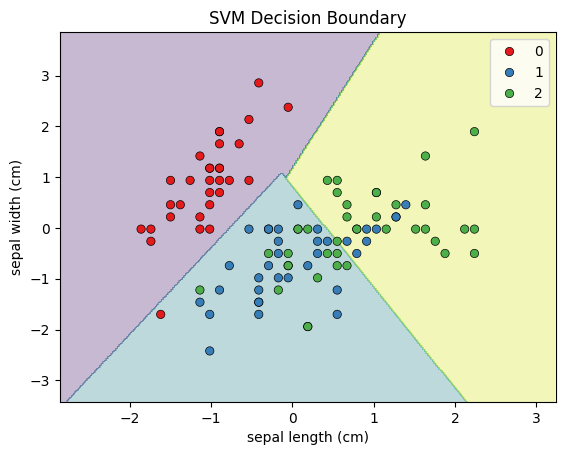

In [4]:
# Função para plotar as margens do SVM
def plot_svm_decision_boundary(model, X, y):
    # Obter os limites dos eixos
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Prever as classes para cada ponto no grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Configurar o gráfico
    plt.contourf(xx, yy, Z, alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1', edgecolor='k')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title('SVM Decision Boundary')

# Plotar a fronteira de decisão SVM
plot_svm_decision_boundary(model, X_train, y_train)
plt.show()


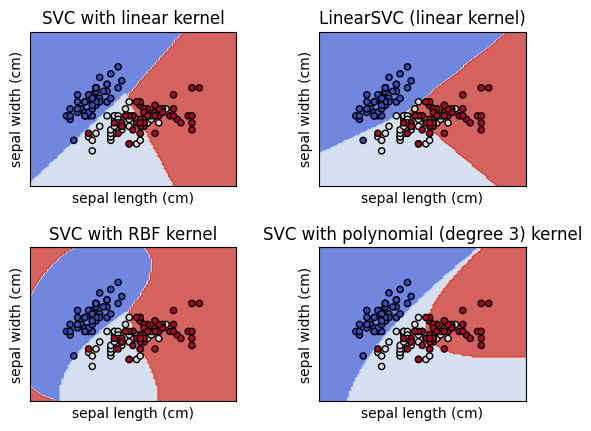

In [5]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

❇️ Exemplo:

Carregar os dados Credit.csv

In [6]:
import pandas as pd

credito = pd.read_csv("Credit.csv")
credito



,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,<100,4<=X<7,3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,<0,30,'existing paid','used car',3857,<100,1<=X<4,4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,'existing paid',radio/tv,1845,<100,1<=X<4,4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


Separar previsores da classe

In [7]:
features = credito.iloc[:,0:20].values
features

array([['<0', 6, "'critical/other existing credit'", ..., 1, 'yes',
        'yes'],
       ['0<=X<200', 48, "'existing paid'", ..., 1, 'none', 'yes'],
       ["'no checking'", 12, "'critical/other existing credit'", ..., 2,
        'none', 'yes'],
       ...,
       ["'no checking'", 12, "'existing paid'", ..., 1, 'none', 'yes'],
       ['<0', 45, "'existing paid'", ..., 1, 'yes', 'yes'],
       ['0<=X<200', 45, "'critical/other existing credit'", ..., 1,
        'none', 'yes']], dtype=object)

In [8]:
classes = credito.iloc[:,20].values
classes

array(['good', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'bad',
       'good', 'good', 'bad', 'good', 'good', 'bad', 'bad', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'bad', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'go

Converter colunas para dados numéricos

In [9]:
from sklearn.preprocessing import LabelEncoder
labenc = LabelEncoder()

colunas = [0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19]

for i in colunas:
    features[:, i] = labenc.fit_transform(features[:, i]) #é preciso que as colunas em features seja feita com .values

features

array([[2, 6, 1, ..., 1, 1, 1],
       [1, 48, 3, ..., 1, 0, 1],
       [0, 12, 1, ..., 2, 0, 1],
       ...,
       [0, 12, 3, ..., 1, 0, 1],
       [2, 45, 3, ..., 1, 1, 1],
       [1, 45, 1, ..., 1, 0, 1]], dtype=object)

Dividir base de treino e teste

In [10]:
X_treino, X_teste, y_treino, y_teste = train_test_split(features, classes, test_size=0.3, random_state=1)

Criar modelo SVC()

In [11]:
model_svm = SVC()
model_svm.fit(X_treino, y_treino)

SVC()

Fazer previsão com o teste em X

In [12]:
prev = model_svm.predict(X_teste)
prev

array(['good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good

Taxa de acerto

In [13]:
acerto = accuracy_score(y_teste, prev)

Escolher atributos mais importantes

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier()
forest.fit(X_treino, y_treino)
importancias = forest.feature_importances_
importancias

array([0.10360578, 0.07982004, 0.06971517, 0.05832241, 0.08092344,
       0.05270132, 0.04954119, 0.05463241, 0.04525771, 0.02735263,
       0.04936974, 0.0478995 , 0.06736967, 0.04158825, 0.0358067 ,
       0.03350436, 0.04162925, 0.02212189, 0.03212931, 0.00670925])

Repetir o processo de criar o modelo

In [15]:
X_treino2 = X_treino[:, 0:4]
X_treino2.shape

(700, 4)

In [16]:
X_teste2 = X_teste[:, 0:4]
X_teste2.shape

(300, 4)

In [17]:
model_svm2 = SVC()
model_svm2.fit(X_treino2, y_treino)

SVC()

In [18]:
prev2 = model_svm2.predict(X_teste2)
prev2.shape

(300,)

In [19]:
acerto2 = accuracy_score(y_teste, prev2)
print("taxa de acerto 1:", acerto)
print("taxa de acerto 2:", acerto2)

taxa de acerto 1: 0.7166666666666667
taxa de acerto 2: 0.7233333333333334
